## Handwritten Digit recognition Model

In [79]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import ssl
import seaborn as sns
ssl._create_default_https_context = ssl._create_unverified_context

In [80]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [81]:
len(X_train)

60000

In [82]:
len(X_test)

10000

In [83]:
X_train=X_train/255
X_test=X_test/255

In [84]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

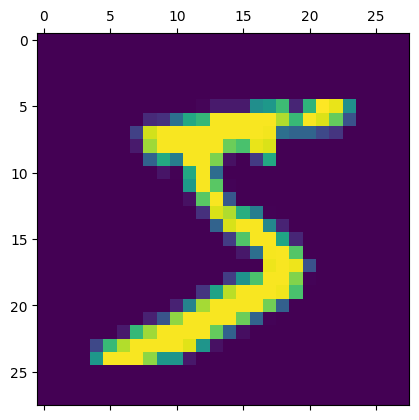

In [85]:
plt.matshow(X_train[0])

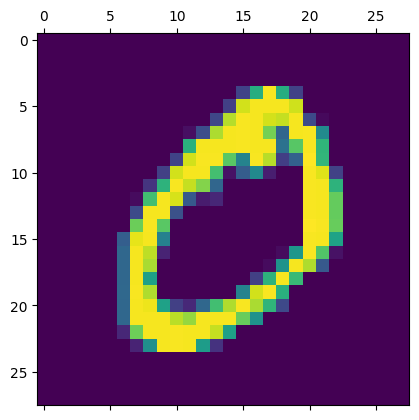

In [86]:
plt.matshow(X_train[1])

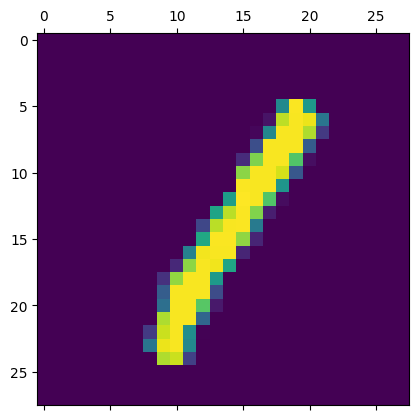

In [87]:
plt.matshow(X_train[23])

In [88]:
y_train[1]

0

In [89]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [90]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="log/",histogram_freq=1)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 2s 895us/step - loss: 0.4656 - accuracy: 0.8790
Epoch 2/6
1875/1875 [==============================] - 2s 902us/step - loss: 0.3031 - accuracy: 0.9157
Epoch 3/6
1875/1875 [==============================] - 2s 905us/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/6
1875/1875 [==============================] - 2s 883us/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/6
1875/1875 [==============================] - 2s 939us/step - loss: 0.2665 - accuracy: 0.9264
Epoch 6/6
1875/1875 [==============================] - 2s 943us/step - loss: 0.2619 - accuracy: 0.9278


In [92]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2681 - accuracy: 0.9265


[0.26811474561691284, 0.9265000224113464]

In [93]:
y_predicted=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [94]:
y_predicted[0]

array([9.12053324e-03, 1.21326806e-07, 3.16194482e-02, 9.58690882e-01,
       2.49922508e-03, 1.21241845e-01, 6.12459587e-07, 9.99745250e-01,
       7.97332451e-02, 6.55119240e-01], dtype=float32)

In [95]:
np.argmax(y_predicted[0])

7

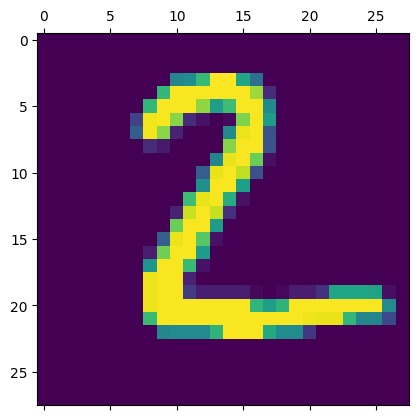

In [96]:
plt.matshow(X_test[1])

In [97]:
np.argmax(y_predicted[1])

2

In [98]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]

In [99]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    6,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   6,    9,  898,   25,   12,    5,   14,   11,   49,    3],
       [   2,    0,   11,  933,    1,   19,    2,    9,   25,    8],
       [   1,    1,    2,    1,  937,    0,   11,    3,    7,   19],
       [   8,    3,    1,   34,   13,  778,   13,    5,   32,    5],
       [   7,    3,    4,    1,    8,   12,  918,    2,    3,    0],
       [   1,    6,   21,    8,    9,    1,    0,  943,    3,   36],
       [   5,    7,    5,   19,   10,   23,    8,    9,  881,    7],
       [  10,    7,    1,    9,   47,    6,    0,   16,    8,  905]])>

In [100]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train_flattened,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2799 - accuracy: 0.9203
Epoch 2/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1277 - accuracy: 0.9632
Epoch 3/6
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0884 - accuracy: 0.9736
Epoch 4/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9803
Epoch 5/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0525 - accuracy: 0.9842
Epoch 6/6
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0412 - accuracy: 0.9877


In [101]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 898us/step - loss: 0.0857 - accuracy: 0.9744


[0.08571629971265793, 0.974399983882904]

In [102]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=7)

Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9215
Epoch 2/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1207 - accuracy: 0.9644
Epoch 3/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9746
Epoch 4/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0641 - accuracy: 0.9807
Epoch 5/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0508 - accuracy: 0.9844
Epoch 6/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0399 - accuracy: 0.9882
Epoch 7/7
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0334 - accuracy: 0.9897


## Activation Function Used 

In [104]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [105]:
sigmoid(1)

0.7310585786300049

In [106]:
sigmoid(100)

1.0

In [107]:
sigmoid(-87)

1.6458114310822737e-38

In [108]:
def tanh(x):
    return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [109]:
tanh(50)

1.0

In [110]:
tanh(1)

0.7615941559557649

In [111]:
def relu(x):
    return max(0,x)

In [112]:
relu(-10)

0

In [113]:
relu(6)

6

In [114]:
def leaky_relu(x):
    return max(0.1*x,x)

In [115]:
leaky_relu(-9)

-0.9